<a href="https://colab.research.google.com/github/IUBAYAR/MIS-351/blob/main/07052024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#  Importing necessary python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Job interviewer's dilemma

For a job vacancy there are 30 applicants but the company has limited human resources personnel and may only interview 10 applicants.

Only after an interview the company can identify the fitness of a certain applicant.\
\
The company also knows how the labor market stats:\
The job applicants population is normally distributed with a mean of 50 and a standard deviation 20.

Text(0, 0.5, 'Frequency')

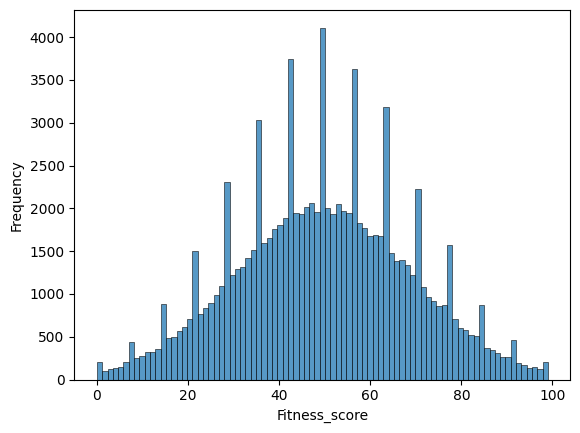

In [4]:
population_data = [int(i) for i in np.random.normal(loc = 50, scale = 20, size = 10**5) if i >= 0 and i <= 100]

sns.histplot( population_data )

plt.xlabel('Fitness_score')
plt.ylabel('Frequency')

Now, you see.\
\
There will be a possibility that the interviewer may identify an applicant who is a better fit for the position on the remaining trials.\
\
And, ofcourse, rejecting a current applicant may be a huge regret too...\
\
So, given a specific 30 applicants being interviewed on a random sequence, what would be good scores to settle for each trial?

In [5]:
#  converting population data to a pandas.Series to draw a random sample with a random_state = 351
applicants = pd.Series( population_data ).sample( frac = 30/len( population_data ), random_state = 351 )
#  converting back to a list
applicants = applicants.to_list()

applicants

[43,
 46,
 46,
 62,
 37,
 51,
 60,
 64,
 46,
 70,
 45,
 61,
 34,
 34,
 48,
 68,
 38,
 25,
 79,
 72,
 58,
 27,
 38,
 56,
 29,
 62,
 64,
 54,
 19,
 46]

In [6]:
#  trial 1: picking up a random applicant
current_applicant = np.random.choice( applicants, replace = False )
#    removing the current applicant from the uninterviewed crowd
applicants.remove( current_applicant )
current_applicant

61

In [7]:
#  The propability of getting a better applicant on the remaining trials based on the population information
1 - (
len(
pd.Series( population_data )[ pd.Series( population_data ) <= current_applicant ]
) / len( population_data )
)**9

0.9433528966195122

In [8]:
#  trial 2: picking up a random applicant
current_applicant = np.random.choice( applicants, replace = False )
#    removing the current applicant from the uninterviewed crowd
applicants.remove( current_applicant )
current_applicant

46

In [9]:
#  The probability of getting a better applicant on the remaining trials based on the population information
1 - (
len(
pd.Series( population_data )[ pd.Series( population_data ) <= current_applicant ]
) / len( population_data )
)**8

0.9986673305342392

In [10]:
#  trial 3: picking up a random applicant
current_applicant = np.random.choice( applicants, replace = False )
#    removing the current applicant from the uninterviewed crowd
applicants.remove( current_applicant )
current_applicant

64

In [11]:
#  The propability of getting a better applicant on the remaining trials based on the population information
1 - (
len(
pd.Series( population_data )[ pd.Series( population_data ) <= current_applicant ]
) / len( population_data )
)**7

0.8304173571929094

In [47]:
#  A generalization of trials and outcomes
instance = {}

applicants = pd.Series( population_data ).sample( frac = 30/len( population_data ), random_state = 351 ).to_list()

for t in np.arange(1,10 + 1):
  current_applicant = np.random.choice( applicants, replace = False )
  applicants.remove( current_applicant )

  instance[t] = current_applicant, 1 - (
  len(
  pd.Series( population_data )[ pd.Series( population_data ) <= current_applicant ]
  ) / len( population_data )
  )**(10-t)
instance

{1: (63, 0.9147848039924855),
 2: (55, 0.9786384648650963),
 3: (23, 0.9999999482533642),
 4: (45, 0.9947114543974618),
 5: (36, 0.9989439743058247),
 6: (17, 0.9999943215049052),
 7: (70, 0.37058441467239334),
 8: (59, 0.519134956975223),
 9: (81, 0.05018280517323448),
 10: (66, 0.0)}

What is the probability of regretting to reject an applicant scoring over 70?

In [110]:
#  A generalization of trials and outcomes
liste = []

for i in np.arange(10**4):

  instance = []

  regret = 0

  applicants = pd.Series( population_data ).sample( frac = 30/len( population_data ), random_state = 351 ).to_list()

  k = None
  for t in np.arange(10):

    current_applicant = np.random.choice( applicants, replace = False )
    applicants.remove( current_applicant )

    instance.append( current_applicant )

    if (instance[-1] >= 70) and (k == None):
      k = t

    if k != None:
      regret += len( pd.Series( instance[k:] )[ pd.Series(instance[k:]) > instance[k] ] )

  regret = bool(1 - bool(regret))

  if k != None:
    liste.append(regret)

np.array(liste).mean()

0.518472265584348

What is the probability of rejecting to hire the first applicant scoring over 75?

In [109]:
#  A generalization of trials and outcomes
liste = []

for i in np.arange(10**4):

  instance = []

  regret = 0

  applicants = pd.Series( population_data ).sample( frac = 30/len( population_data ), random_state = 351 ).to_list()

  k = None
  for t in np.arange(10):

    current_applicant = np.random.choice( applicants, replace = False )
    applicants.remove( current_applicant )

    instance.append( current_applicant )

    if (instance[-1] >= 75) and (k == None):
      k = t

    if k != None:
      regret += len( pd.Series( instance[k:] )[ pd.Series(instance[k:]) > instance[k] ] )

  regret = bool(regret)

  if k != None:
    liste.append(regret)

np.array(liste).mean()

0.2676669893514037